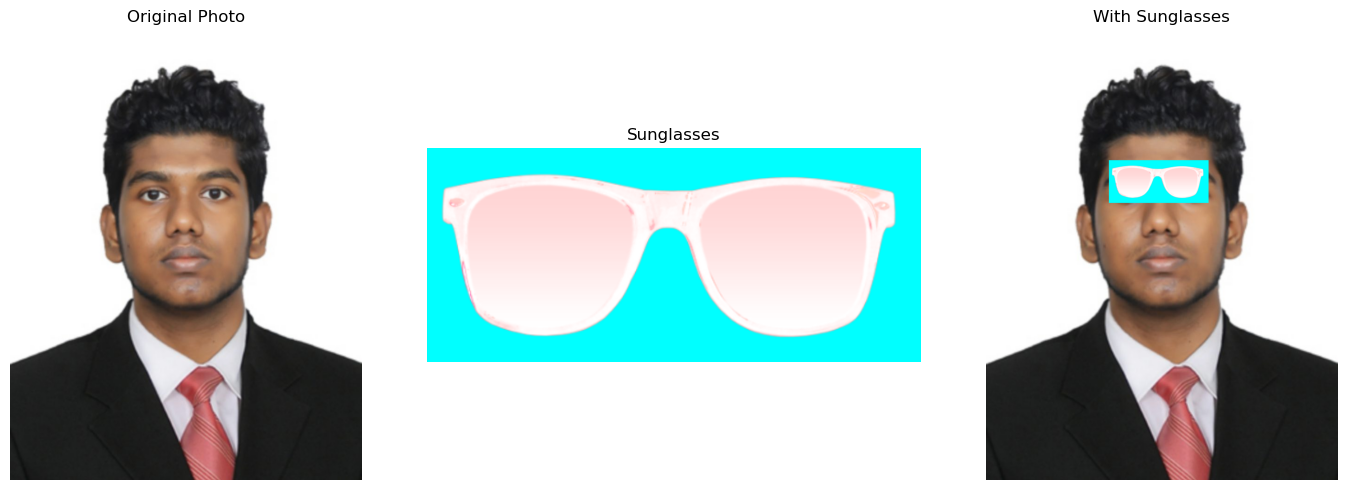

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load images
face_img = cv2.imread(r'C:\Users\admin\Downloads\Phone Link\k.jpg')
glass_img = cv2.imread(r'C:\Users\admin\OneDrive\Pictures\Screenshots\s.png', cv2.IMREAD_UNCHANGED)

# Convert BGR to RGB for plotting
face_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
glass_rgba = cv2.cvtColor(glass_img, cv2.COLOR_BGRA2RGBA)

# Eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Overlay if two eyes are found
if len(eyes) >= 2:
    eyes = sorted(eyes, key=lambda x: x[0])[:2]  # sort by X
    x1, y1, w1, h1 = eyes[0]
    x2, y2, w2, h2 = eyes[1]

    center_x = (x1 + x2 + w1 // 2 + w2 // 2) // 2
    center_y = (y1 + y2) // 2

    glasses_width = (x2 + w2) - x1
    scale = glasses_width / glass_img.shape[1]
    new_size = (int(glass_img.shape[1] * scale), int(glass_img.shape[0] * scale))
    resized_glass = cv2.resize(glass_img, new_size)

    x_offset = x1
    y_offset = center_y - resized_glass.shape[0] // 2 + 10

    # Make face 4-channel
    if face_img.shape[2] == 3:
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2BGRA)

    result = face_img.copy()

    # Overlay function
    def overlay_transparent(bg, overlay, x, y):
        h, w = overlay.shape[:2]
        for i in range(h):
            for j in range(w):
                if y+i >= bg.shape[0] or x+j >= bg.shape[1] or x+j < 0 or y+i < 0:
                    continue
                alpha = overlay[i, j, 3] / 255.0
                if alpha > 0:
                    for c in range(3):
                        bg[y+i, x+j, c] = int((1 - alpha) * bg[y+i, x+j, c] + alpha * overlay[i, j, c])
        return bg

    combined = overlay_transparent(result, resized_glass, x_offset, y_offset)
    combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGRA2RGBA)

    # Show all three images
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,3,1)
    plt.imshow(face_rgb)
    plt.title("Original Photo")
    plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.imshow(glass_rgba)
    plt.title("Sunglasses")
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.imshow(combined_rgb)
    plt.title("With Sunglasses")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Could not detect two eyes.")